In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
robbery_data = pd.read_csv('/home/souvik/Repos/Datasets/monthly-robberies.csv', index_col=0, parse_dates=True)

In [3]:
robbery_data.head()

,Robberies
Month,
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43


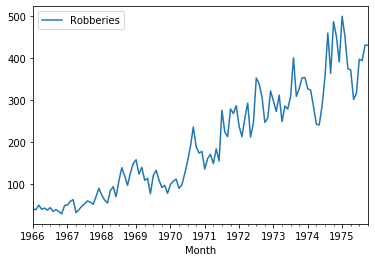

In [4]:
robbery_data.plot()

In [5]:
# Find seasonality, if any

decomposition = seasonal_decompose(robbery_data, model='multiplicative')

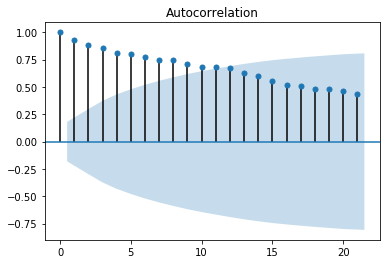

In [6]:
acf = plot_acf(robbery_data)

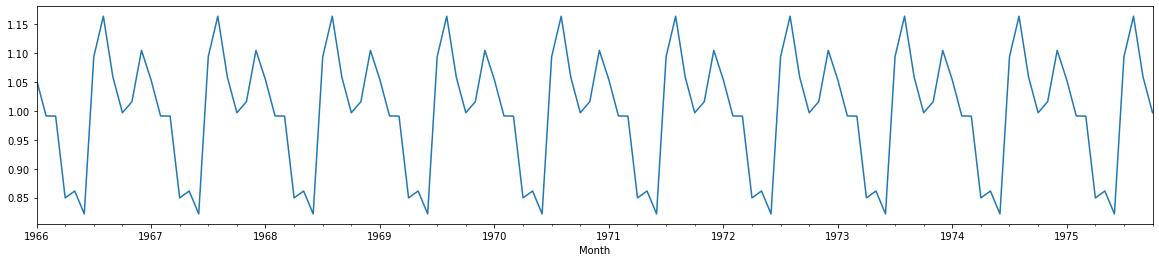

In [7]:
decomposition.seasonal.plot(figsize=(20, 4))

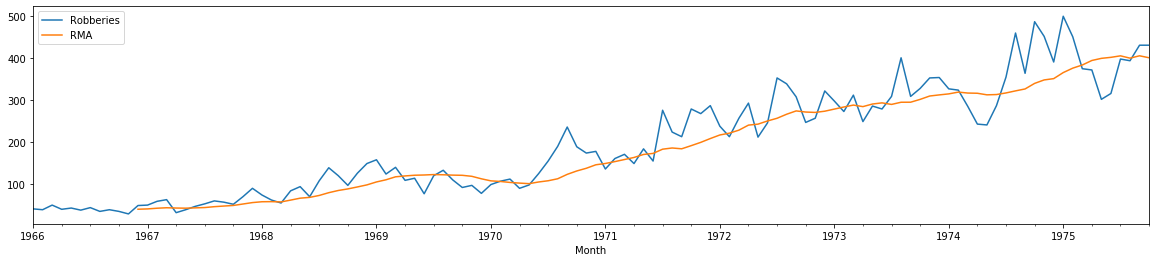

In [8]:
# Seasonal
# Period = 12 months


robbery_data['RMA'] = robbery_data['Robberies'].rolling(12).mean()
robbery_data.plot(figsize=(20, 4))

In [9]:
def check_stationarity(dataset):
    adf_output = adfuller(dataset)
    print(adf_output)

In [10]:
check_stationarity(robbery_data['Robberies'])

(1.00110214024579, 0.9942775638057231, 11, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, 1051.4437803466026)


In [11]:
robbery_data['first diff'] = robbery_data['Robberies'] - robbery_data['Robberies'].shift(1)

In [12]:
check_stationarity(robbery_data['first diff'].dropna())

(-7.428564475067207, 6.450795412686704e-11, 10, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, 1041.4791856387887)


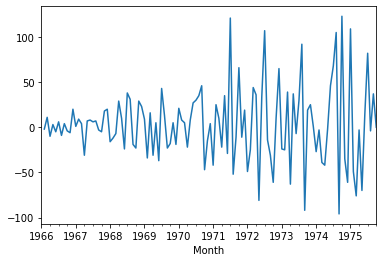

In [13]:
robbery_data['first diff'].plot()

In [14]:
robbery_data['seasonal first diff'] = robbery_data['Robberies'] - robbery_data['Robberies'].shift(12)

In [15]:
check_stationarity(robbery_data['seasonal first diff'].dropna())

(-2.2884064010455885, 0.17573440564465925, 13, 92, {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}, 960.397680547319)


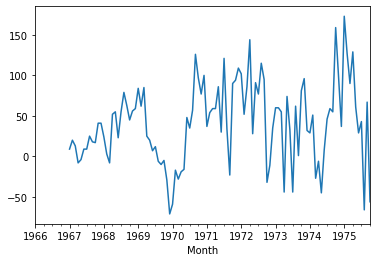

In [16]:
robbery_data['seasonal first diff'].plot()

In [17]:
# Seasonal first/second diff

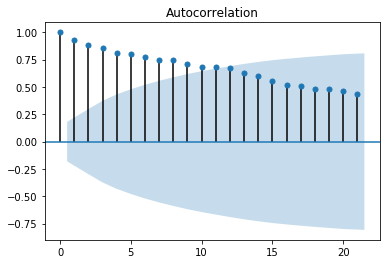

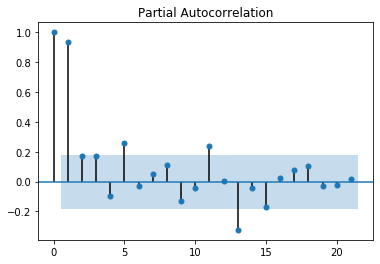

In [18]:
# ACF, PACF 

acf = plot_acf(robbery_data['Robberies'])
pacf = plot_pacf(robbery_data['Robberies'])

In [19]:
# (1,1,0)

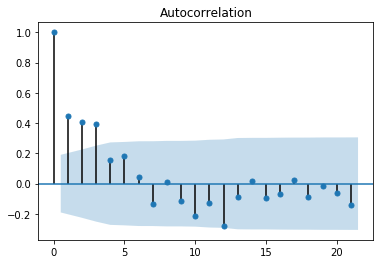

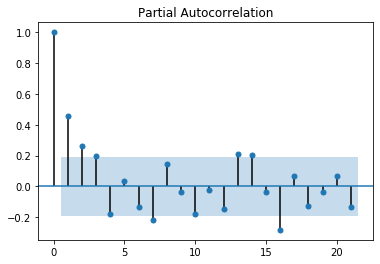

In [20]:
sacf = plot_acf(robbery_data['seasonal first diff'].dropna())
spacf = plot_pacf(robbery_data['seasonal first diff'].dropna())

In [21]:
# (0,1,0, 12)

In [64]:
model=sm.tsa.statespace.SARIMAX(robbery_data['Robberies'], order=(3,1,3), seasonal_order=(4, 1, 4, 12))

/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [65]:
res = model.fit()

/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/souvik/anaconda3/envs/tsa/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

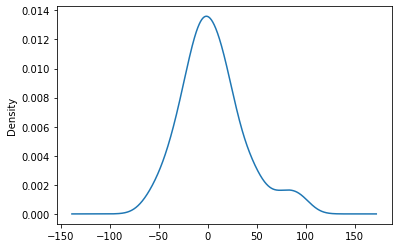

In [66]:
res.resid.plot(kind='kde')

In [74]:
prediction = res.predict(start=0, end=len(robbery_data)+36)

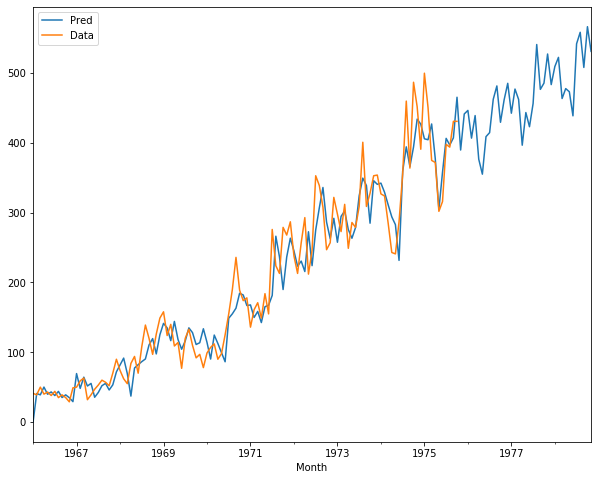

In [75]:
prediction.plot(figsize=(10, 8), label='Pred')
robbery_data['Robberies'].plot(label='Data')
plt.legend()

In [69]:
mean_squared_error(robbery_data['Robberies'], prediction)

1044.0228660146083